# Data exploration (3dshapes)

**Author**: Maleakhi A. Wijaya  
**Description**:  
This notebook explores the smallnorb dataset. We visualise the original 3dshapes images as well as their shifted counterparts.  
**Details**: this file contains functions used to load and preprocess the smallNORB dataset. The smallNORB dataset is intended for experiments in 3D object recognition from shape. It contains the following latent factors:
- category (5 possible values - original task label)
- instance (10)
- elevation (9)
- azimuth (18)
- lighting (6) 

**Notes**: see [smallNORB](https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/) for more details.

In [1]:
# Load utilities functions
%run ../../scripts/smallnorb_utils.py
%run ../../scripts/shift_applicator.py

## Load smallNORB

This section loads the smallNORB data. We then visualise several images.

In [2]:
directory_path = "../../data/"
X_data, c_data = load_smallnorb(directory_path)

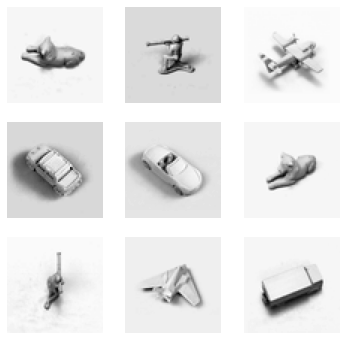

In [3]:
# Select images
imgs_sampled = X_data[10:20].reshape(-1, 64, 64)

# Show images
show_images_grid(imgs_sampled, num_images=9)

## Shift applicator

We apply various shifts to the data and visualise the resulting images.

In [15]:
# Reshape
# It is noteworthy that for efficiency, we represent the images as only 2 dimension
# when we preprocessing (number of instances/ batch size * flatten size).
# When visualising back the image, we need to reshape it back to the original dimension
ORIGINAL_SHAPE = X_data.shape[1:] # constant hold the image original shape
X_data_flatten = deepcopy(X_data.reshape(X_data.shape[0], -1))

### Gaussian shift

In [22]:
# Large gaussian shift affecting 50% data instance
X_gaussian, y_gaussian = apply_gaussian_shift(deepcopy(X_data_flatten), c_data[:, 0], 
                                              ShiftIntensity.Medium, 0.5) 

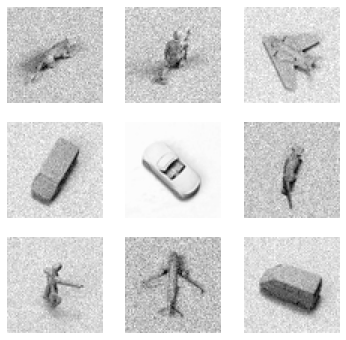

In [23]:
show_images_grid(X_gaussian.reshape([-1, 64, 64]), num_images=9)

### Knockout shift

In [25]:
X_ko, y_ko = apply_ko_shift(deepcopy(X_data_flatten), c_data[:, 0], 
                            ShiftIntensity.Medium, cl=MAJORITY) 

In [28]:
pd.DataFrame(y_ko).value_counts()

1    9720
2    9720
3    9720
4    9720
0    4860
dtype: int64

### Concept shift

In [29]:
X_cs, y_cs, c_cs = apply_concept_shift(deepcopy(X_data_flatten), c_data[:, 0],
                                      c_data, 1, ShiftIntensity.Medium,
                                      cl=MAJORITY)

In [30]:
pd.DataFrame(c_cs[:,1]).value_counts()

0    4860
1    4860
2    4860
3    4860
4    4860
5    4860
6    4860
7    4860
9    4860
8    2430
dtype: int64

### Image shift

**All**

In [31]:
X_img, y_img = apply_img_shift(deepcopy(X_data_flatten), c_data[:,0], ORIGINAL_SHAPE, 
                               ShiftIntensity.Large, 1.0, ShiftType.All)

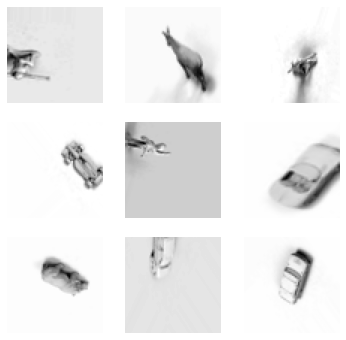

In [32]:
show_images_grid(X_img.reshape([-1, 64, 64])[np.random.randint(0, 2000, 50)], num_images=9)

**Isolated**

In [35]:
X_img, y_img = apply_img_shift(deepcopy(X_data_flatten), c_data[:,0], ORIGINAL_SHAPE, 
                               ShiftIntensity.Large, 1.0, [ShiftType.Flip])

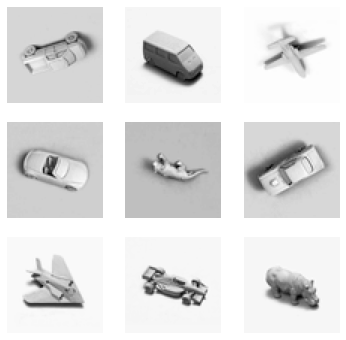

In [36]:
show_images_grid(X_img.reshape([-1, 64, 64])[np.random.randint(0, 2000, 50)], num_images=9)